<h1>about data</h1>
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than other etc).



<h1>Target </h1>
build a model that predicts whether a
passenger on the Titanic survived or no 

<h1>reading data</h1>

In [472]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns',None)

In [473]:
df=pd.read_csv('Titanic-Dataset.csv')

In [474]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [475]:
df.shape

(891, 12)

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [477]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [478]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h1>EDA</h1>

In [479]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

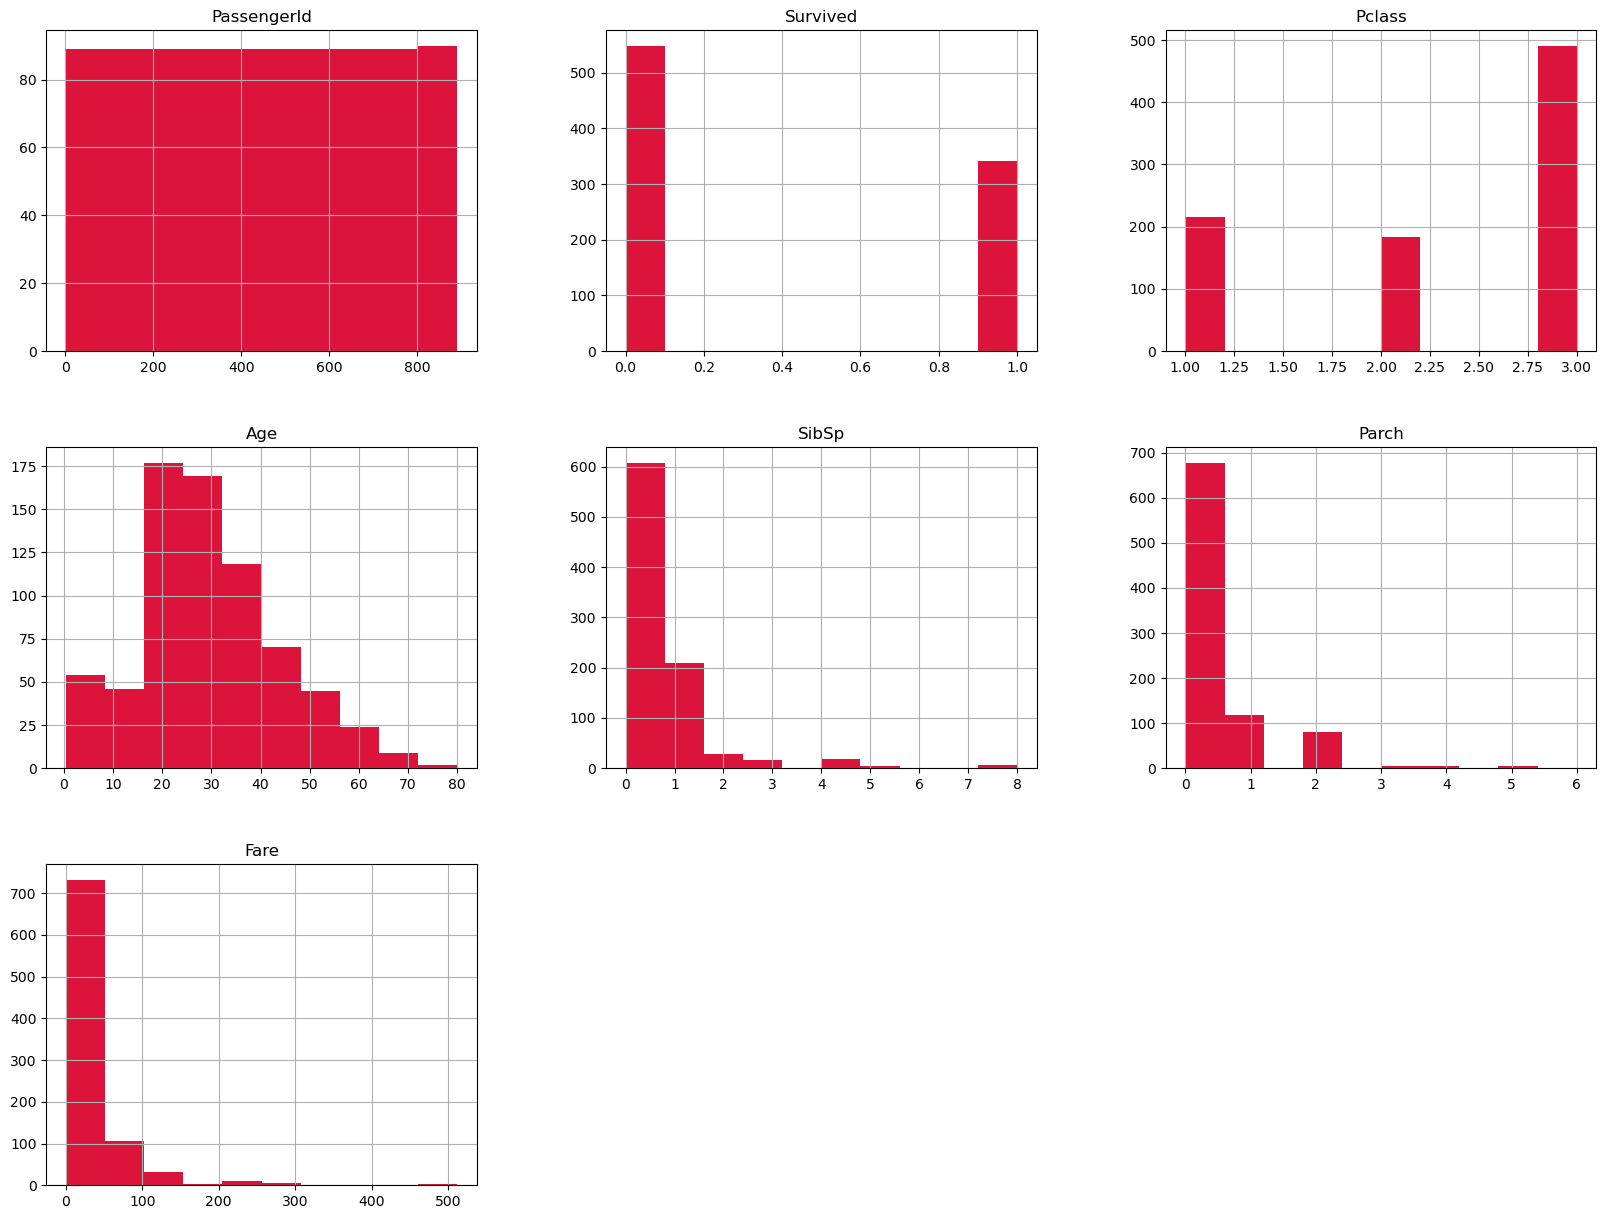

In [480]:
df.hist(figsize=(20, 15),color='crimson')
plt.show()

the number of survived and non survived people

In [481]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [482]:
survived_count=df['Survived'].value_counts()
labels=['Not Survived','Survived']

([<matplotlib.patches.Wedge at 0x1fd6412f890>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Not Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

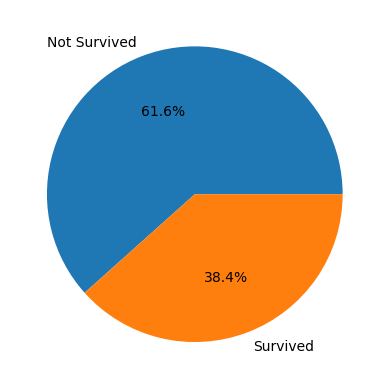

In [483]:
plt.pie(survived_count,labels=labels, autopct='%1.1f%%')

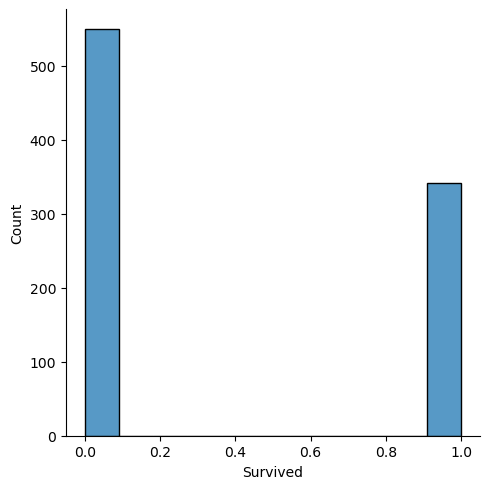

In [484]:
sns.displot(x=df['Survived'])

In [485]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

distribution of gender

In [486]:
count_gender=df['Sex'].value_counts()
count_gender

Sex
male      577
female    314
Name: count, dtype: int64

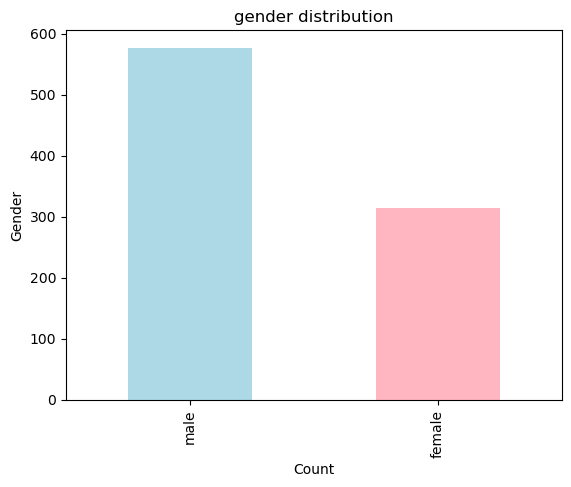

In [487]:
count_gender.plot(kind='bar',color=['lightblue','lightpink'])
plt.title('gender distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()




In [488]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

distribution of Pclass

In [489]:
count_p=df['Pclass'].value_counts()
count_p

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

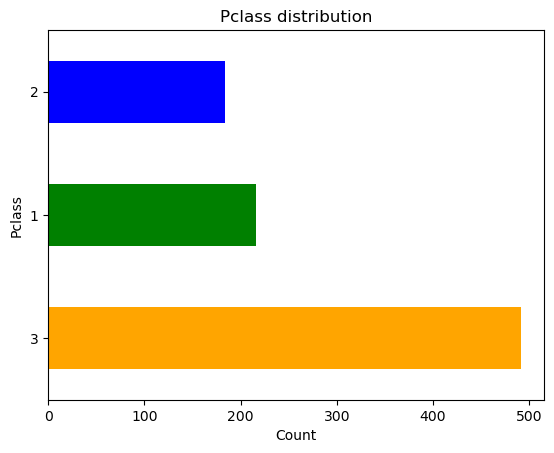

In [490]:
count_p.plot(kind='barh',color=['orange','green','blue'])
plt.title('Pclass distribution')
plt.xlabel('Count')
plt.ylabel('Pclass')
plt.show()

survival count by gender 

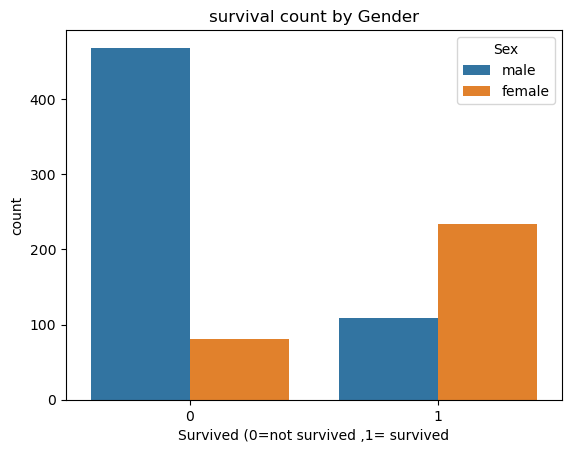

In [491]:
sns.countplot(x='Survived' ,hue='Sex',data=df)
plt.title('survival count by Gender')
plt.xlabel('Survived (0=not survived ,1= survived')
plt.ylabel('count')
plt.show()

survival rate by Pclass

In [492]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean().reset_index()

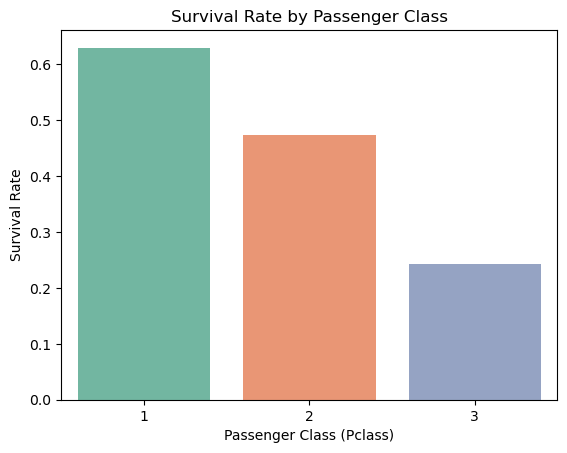

In [493]:
sns.barplot(x='Pclass', y='Survived', data=survival_rate_by_class, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Survival Rate')
plt.show()

<h1>preprocessing</h1>

In [494]:
duplicated=df.duplicated()
duplicated.sum()

0

In [495]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

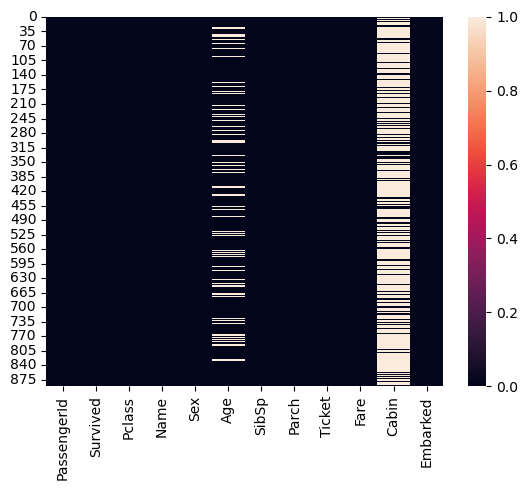

In [496]:
sns.heatmap(df.isnull())

In [497]:
df=df.drop(columns=['Cabin'],axis=1)

In [498]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [499]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [500]:
x=df['Age'].dropna()

In [501]:
df['Age']=df['Age'].fillna(pd.Series(np.random.choice(x,len(df.index))))

In [502]:
df['Age']=df['Age'].astype('int')
df['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888     0
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [503]:
df.isnull().sum()/df.shape[0]*100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [504]:
df.dropna(subset=['Embarked'],inplace=True)

In [505]:
df.isnull().sum()/df.shape[0]*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

<Axes: >

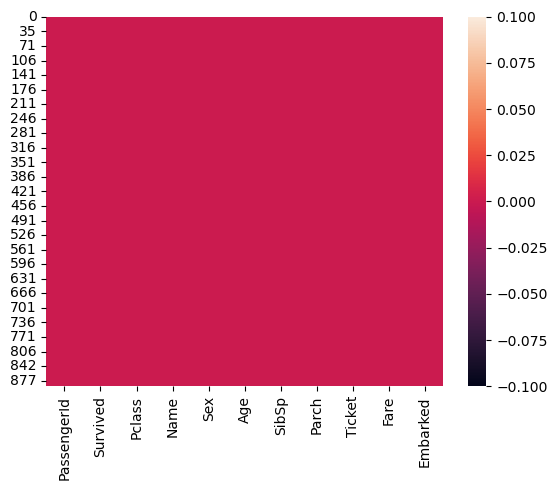

In [506]:
sns.heatmap(df.isnull())

<h1>outliers</h1>

In [507]:
df.shape

(889, 11)

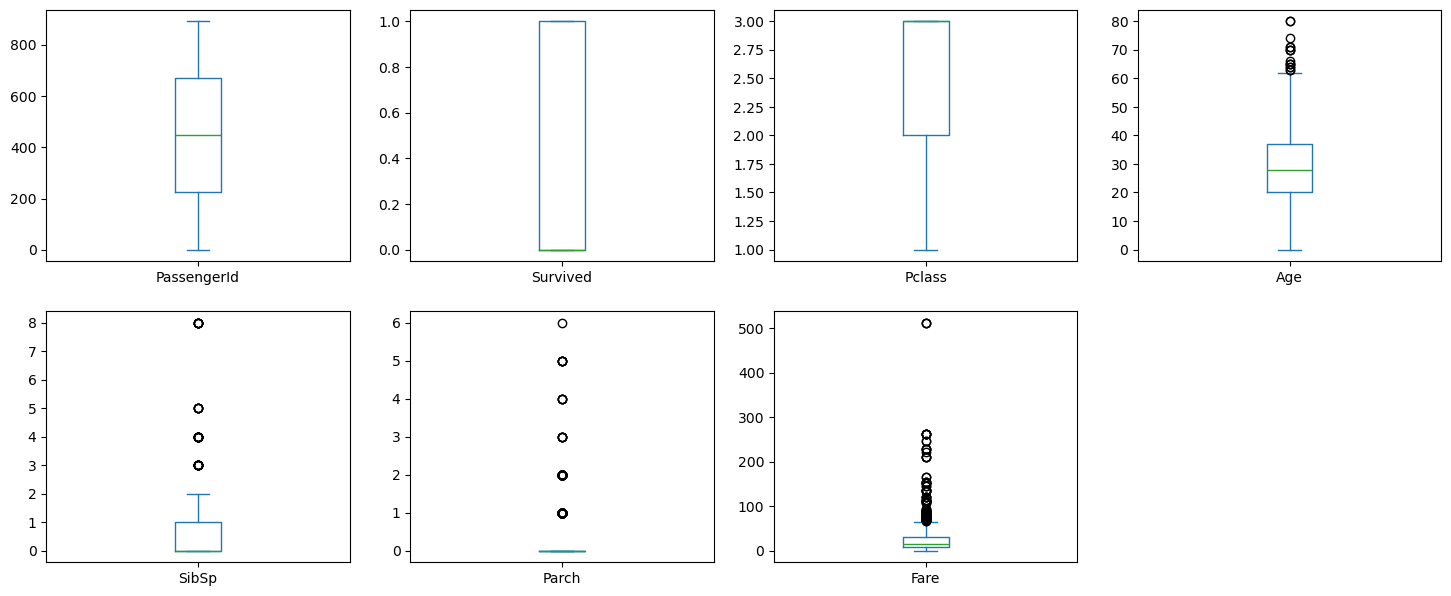

In [508]:
df.plot(kind = "box" , subplots = True , figsize = (18,15) , layout = (4,4))
plt.show()

In [509]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: xlabel='Age'>

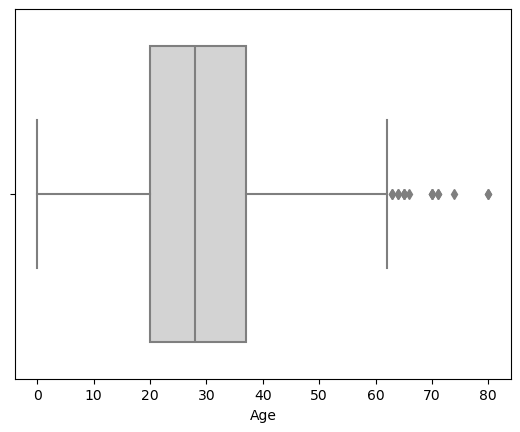

In [510]:
sns.boxplot(x=df['Age'],color='lightgray')

In [511]:
print('outliers',df[(df['Age']>75)].count())

outliers PassengerId    2
Survived       2
Pclass         2
Name           2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Embarked       2
dtype: int64


In [512]:
df = df[(df['Age'] < 75 )]
df.shape

(887, 11)

<Axes: xlabel='SibSp'>

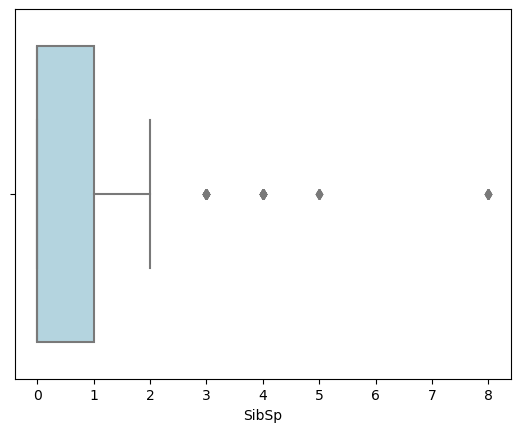

In [513]:
sns.boxplot(x=df['SibSp'],color='lightblue')

In [514]:
print('outliers',df[(df['SibSp']>7)].count())

outliers PassengerId    7
Survived       7
Pclass         7
Name           7
Sex            7
Age            7
SibSp          7
Parch          7
Ticket         7
Fare           7
Embarked       7
dtype: int64


In [515]:
df = df[(df['SibSp'] < 7 )]
df.shape

(880, 11)

<Axes: xlabel='Fare'>

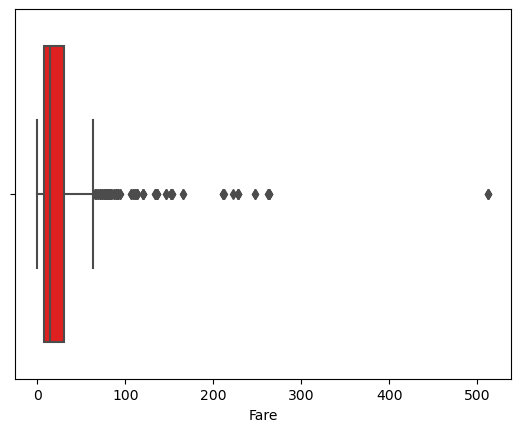

In [516]:
sns.boxplot(x=df['Fare'],color='red')

In [517]:
print('outliers',df[(df['Fare']>400)].count())

outliers PassengerId    3
Survived       3
Pclass         3
Name           3
Sex            3
Age            3
SibSp          3
Parch          3
Ticket         3
Fare           3
Embarked       3
dtype: int64


In [518]:
df = df[(df['Fare']  < 400 )]
df.shape

(877, 11)

In [520]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [521]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.006638,-0.032807,0.025349,-0.080958,-0.004390,-0.003297
Survived,-0.006638,1.000000,-0.327741,-0.065601,0.012651,0.099556,0.267735
Pclass,-0.032807,-0.327741,1.000000,-0.333993,0.042856,0.003142,-0.614268
Age,0.025349,-0.065601,-0.333993,1.000000,-0.270031,-0.166473,0.102414
SibSp,-0.080958,0.012651,0.042856,-0.270031,1.000000,0.391572,0.204683
Parch,-0.004390,0.099556,0.003142,-0.166473,0.391572,1.000000,0.255453
Fare,-0.003297,0.267735,-0.614268,0.102414,0.204683,0.255453,1.000000


In [522]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [524]:
df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)

In [525]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


<h1>Encoding</h1>

In [526]:
from sklearn.preprocessing import LabelEncoder

In [527]:
label_encoder=LabelEncoder()

In [528]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [529]:
df['Sex']=label_encoder.fit_transform(df['Sex'])

In [530]:
df['Embarked']=label_encoder.fit_transform(df['Embarked'])

In [531]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


<h1>Scaling</h1>

In [532]:
from sklearn.preprocessing import StandardScaler

In [533]:
scaler=StandardScaler()

In [534]:
df[['Age']]=scaler.fit_transform(df[['Age']])
df[['Fare']]=scaler.fit_transform(df[['Fare']])

In [535]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.515856,1,0,-0.556563,2
1,1,1,0,0.625321,1,0,0.997968,0
2,1,3,0,-0.230561,0,0,-0.540176,2
3,1,1,0,0.411351,1,0,0.556533,2
4,0,3,1,0.411351,0,0,-0.537141,2
...,...,...,...,...,...,...,...,...
886,0,2,1,-0.159238,0,0,-0.416971,2
887,1,1,0,-0.729826,0,0,-0.004263,2
888,0,3,0,-2.084974,1,2,-0.163277,2
889,1,1,1,-0.230561,0,0,-0.004263,0


In [536]:
#Correlation with target 
cor = df.corr()
cor_target = abs(cor["Survived"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features.sort_values("Survived" , ascending=False)

,Survived
Survived,1.000000
Sex,0.549723
Pclass,0.327741
Fare,0.267735
Embarked,0.161881
Parch,0.099556
Age,0.065601
SibSp,0.012651


<h1>modeling</h1>

In [538]:
from sklearn.model_selection import train_test_split

In [539]:
x = df.drop("Survived", axis = 1).values
y = df['Survived'].values

In [540]:
x_train,x_test ,y_train,y_test = train_test_split(x,y , test_size= 0.20 , random_state=42)

In [541]:
from sklearn.linear_model import LogisticRegression

In [542]:
lr = LogisticRegression()

In [543]:
lr.fit(x_train,y_train)

LogisticRegression()

In [546]:
lr.score(x_train,y_train)*100

80.31383737517832

In [547]:
lr.score(x_test,y_test)*100

77.27272727272727

In [549]:
y_pred=lr.predict(x_test)


In [550]:
predi = pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred })
predi.head(7)

,Y_Test,Y_Pred
0,0,0
1,1,0
2,1,0
3,0,1
4,0,0
5,1,1
6,0,1


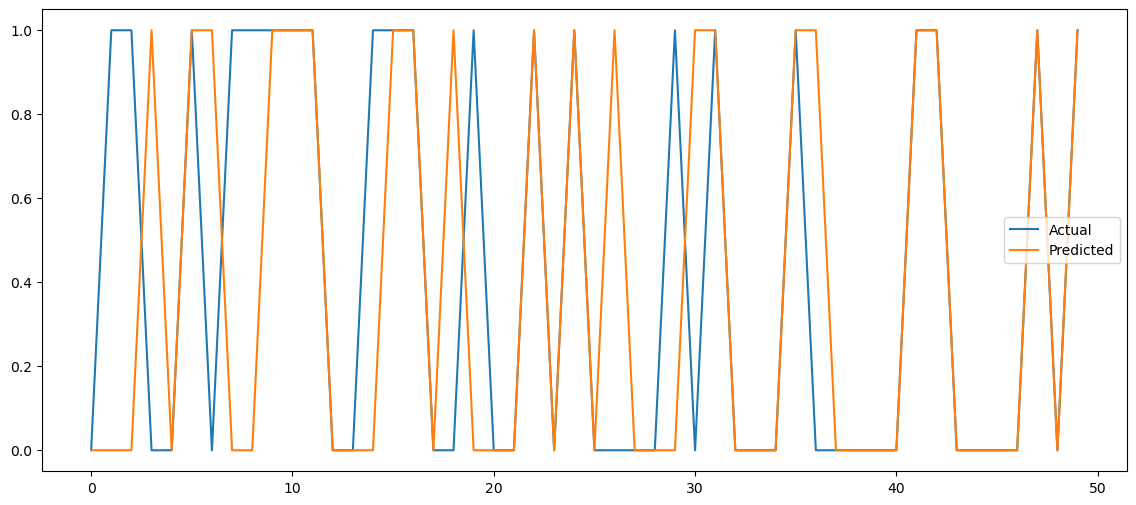

In [551]:
plt.figure(figsize=(14,6))
plt.plot(predi[:50])
plt.legend(['Actual', 'Predicted'])


svc

In [552]:
from sklearn.svm import SVC


In [553]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [554]:
model.score(x_train,y_train)

0.8288159771754636

In [555]:
model.score(x_test,y_test)

0.7954545454545454

In [556]:
y_predq=model.predict(x_test)


In [557]:
predd = pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_predq })
predd.head(7)

,Y_Test,Y_Pred
0,0,0
1,1,0
2,1,0
3,0,1
4,0,0
5,1,1
6,0,1


In [562]:
from sklearn.neighbors import KNeighborsClassifier

In [563]:
knn = KNeighborsClassifier(n_neighbors=7 )

In [564]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [565]:
knn.score(x_train,y_train)

0.8359486447931527

In [566]:
knn.score(x_test,y_test)

0.7897727272727273